In [0]:
#Uncomment line below and run if you need to clear all your resources
#!kill -9 -1

In [0]:
#Upgrade to the latest scipy to get rid of a warning message in later installs
!pip install --upgrade scipy -q

In [0]:
#Install the version of pytorch required for fastai (0.4.0 also works but you get warning messages)
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl -q && pip install torchvision -q

In [0]:
#Instal fastai
!pip install fastai -q

RESTART RUNTIME (FROM TOOL BAR) AFTER COMPLETING THE ABOVE INSTALLS:  Runtime -> Restart runtime...

In [40]:
#Just checking to see what directories are visible
!ls

datalab  distracted_driver-data  driver_imgs_list.csv.zip  imgs.zip


In [0]:
#Create directory for holding all the data
!mkdir distracted_driver-data

In [3]:
#Just checking that the data directory was installed
!ls

datalab  distracted_driver-data


In [0]:
!pip install kaggle-cli --quiet

In [0]:
!kg config -g -u esteban.j.guillen@gmail.com -p wildcats -c state-farm-distracted-driver-detection

In [7]:
!kg download -f imgs.zip

/usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py:37: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 37 of the file /usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  response.content, **soup_config)
downloading https://www.kaggle.com/c/state-farm-distracted-driver-detection/download/imgs.zip

imgs.zip   9% |###                                  | ETA:  0:02:00  30.8 MiB/simgs.zip 100% |#####################################| Time: 0:02:15  30.3 MiB/s



In [0]:
!unzip -qq imgs.zip -d distracted_driver-data/

In [9]:
!ls

datalab  distracted_driver-data  imgs.zip


In [10]:
!kg download -f driver_imgs_list.csv.zip

/usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py:37: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 37 of the file /usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  response.content, **soup_config)
downloading https://www.kaggle.com/c/state-farm-distracted-driver-detection/download/driver_imgs_list.csv.zip

driver_imgs_list.csv.zip 100% |#####################| Time: 0:00:00 415.4 KiB/s



In [11]:
!unzip driver_imgs_list.csv.zip -d distracted_driver-data

Archive:  driver_imgs_list.csv.zip
  inflating: distracted_driver-data/driver_imgs_list.csv  


In [0]:
#Configure plots to display inside the notebook
%matplotlib inline

In [0]:
#Imports
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
#path to the data
PATH = "distracted_driver-data/"

#size of the images
sz=224


In [17]:
#Taking a quick peak inside the data/dogscats directory
os.listdir(PATH)

['driver_imgs_list.csv', 'test', 'train']

In [18]:
#Taking a quick peaking inside the validation folder, subfolders names are the labels (categories to classify)
os.listdir(f'{PATH}train')

['c8', 'c3', 'c9', 'c4', 'c1', 'c0', 'c2', 'c7', 'c6', 'c5']

In [19]:
#Selecting a few of the cat images from the validation set
files = os.listdir(f'{PATH}train/c0')[:5]
files

['img_10141.jpg',
 'img_97265.jpg',
 'img_100922.jpg',
 'img_77606.jpg',
 'img_35364.jpg']

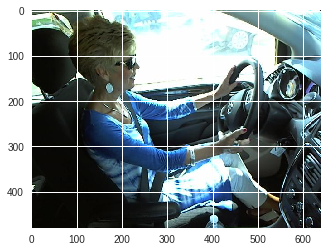

In [20]:
#Displaying one of the cat images, notice that is isn't exactly 224x224
img = plt.imread(f'{PATH}train/c0/{files[0]}')
plt.imshow(img);

In [21]:
img.shape

(480, 640, 3)

In [0]:
import pandas as pd
import random
df = pd.read_csv(PATH + 'driver_imgs_list.csv')


by_drivers = df.groupby('subject')

unique_drivers = list(by_drivers.groups.keys())

train_drivers = unique_drivers[:-6]
valid_drivers = unique_drivers[-6:]






In [0]:
!mkdir distracted_driver-data/valid

In [0]:
!mkdir distracted_driver-data/valid/c0
!mkdir distracted_driver-data/valid/c1
!mkdir distracted_driver-data/valid/c2
!mkdir distracted_driver-data/valid/c3
!mkdir distracted_driver-data/valid/c4
!mkdir distracted_driver-data/valid/c5
!mkdir distracted_driver-data/valid/c6
!mkdir distracted_driver-data/valid/c7
!mkdir distracted_driver-data/valid/c8
!mkdir distracted_driver-data/valid/c9

In [0]:
import os


for index, row in df.iterrows():
  if(row.subject in valid_drivers):
    os.rename("distracted_driver-data/train/"+ row.classname + "/" + row.img, "distracted_driver-data/valid/"+ row.classname + "/" + row.img)
    

In [59]:
!ls distracted_driver-data/train/c0

img_100026.jpg	img_26802.jpg  img_44933.jpg  img_63023.jpg  img_81095.jpg
img_10003.jpg	img_26907.jpg  img_45005.jpg  img_63064.jpg  img_81192.jpg
img_100050.jpg	img_2695.jpg   img_45095.jpg  img_63077.jpg  img_81194.jpg
img_100074.jpg	img_26975.jpg  img_45107.jpg  img_63097.jpg  img_8122.jpg
img_10012.jpg	img_27005.jpg  img_45226.jpg  img_63126.jpg  img_81332.jpg
img_100145.jpg	img_27041.jpg  img_45238.jpg  img_63152.jpg  img_81350.jpg
img_100191.jpg	img_2704.jpg   img_45276.jpg  img_6326.jpg   img_81441.jpg
img_100257.jpg	img_27079.jpg  img_45290.jpg  img_63314.jpg  img_81503.jpg
img_100312.jpg	img_27110.jpg  img_45304.jpg  img_63345.jpg  img_81517.jpg
img_100337.jpg	img_27134.jpg  img_45427.jpg  img_63349.jpg  img_81527.jpg
img_100456.jpg	img_27187.jpg  img_45486.jpg  img_63389.jpg  img_81530.jpg
img_10053.jpg	img_27214.jpg  img_45499.jpg  img_63398.jpg  img_8156.jpg
img_100542.jpg	img_27276.jpg  img_45509.jpg  img_63414.jpg  img_81588.jpg
img_1005.jpg	img_27282.jpg  img_45554.jpg  

In [58]:
!ls distracted_driver-data/valid/c0

img_100598.jpg	img_29055.jpg  img_45932.jpg  img_65494.jpg  img_81340.jpg
img_100796.jpg	img_29306.jpg  img_46484.jpg  img_65547.jpg  img_81383.jpg
img_100828.jpg	img_29350.jpg  img_46818.jpg  img_65674.jpg  img_81396.jpg
img_101196.jpg	img_29357.jpg  img_47184.jpg  img_656.jpg    img_81502.jpg
img_10141.jpg	img_29873.jpg  img_47329.jpg  img_65899.jpg  img_81643.jpg
img_101668.jpg	img_29904.jpg  img_4733.jpg   img_65901.jpg  img_81735.jpg
img_101785.jpg	img_29918.jpg  img_47385.jpg  img_66097.jpg  img_82027.jpg
img_102087.jpg	img_30060.jpg  img_47447.jpg  img_66350.jpg  img_8222.jpg
img_10307.jpg	img_30245.jpg  img_47451.jpg  img_66490.jpg  img_82267.jpg
img_10446.jpg	img_30520.jpg  img_47528.jpg  img_66541.jpg  img_82290.jpg
img_104.jpg	img_31032.jpg  img_47558.jpg  img_66609.jpg  img_82353.jpg
img_10514.jpg	img_31068.jpg  img_48175.jpg  img_66723.jpg  img_82365.jpg
img_1053.jpg	img_31076.jpg  img_48288.jpg  img_66819.jpg  img_82453.jpg
img_10704.jpg	img_31404.jpg  img_48339.jpg  img_

In [0]:
# Uncomment the below if you need to reset your precomputed activations
shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [61]:
#Define our pretrained network architecture
arch=resnet34

#Load our date from disk, images will be nomalized
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

#Create your model from a pretrained (with ImageNet) resenet architecture. Add new fully connected layers at the end.
learn = ConvLearner.pretrained(arch, data, precompute=True)

#Train for 5 epochs with a learning rate of 0.01
learn.fit(0.01, 5)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 82310488.89it/s]


100%|██████████| 73/73 [00:40<00:00,  1.81it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.393211   2.035972   0.394963  
    1      0.220339   2.048041   0.429617  
 47%|████▋     | 132/278 [00:04<00:04, 32.76it/s, loss=0.204]    2      0.177987   2.112475   0.44619   
    3      0.156585   2.271615   0.415842  
    4      0.120937   2.409851   0.418855  



[array([2.40985]), 0.4188549290096457]

In [62]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(4646, 10)

In [63]:
log_preds[:10]

array([[ -1.14777,  -8.91928,  -8.90098,  -3.59878, -14.12386,  -2.9987 , -14.65902,  -2.77911,  -2.64345,
         -0.75084],
       [ -2.44189,  -5.44573,  -2.65315,  -7.47997,  -7.19177,  -0.658  ,  -5.12117,  -2.19683,  -3.56   ,
         -1.7516 ],
       [ -2.46829,  -2.22536,  -2.96378,  -1.73932,  -2.34169,  -3.99496,  -5.17819,  -1.7711 ,  -2.27233,
         -1.67905],
       [ -0.08332,  -5.7963 ,  -7.0427 ,  -3.63307,  -3.76607,  -6.10484,  -6.62356,  -7.85733,  -3.81945,
         -7.47558],
       [ -1.55025,  -4.35127,  -4.00579,  -0.54034,  -9.21368,  -4.7905 , -10.62783,  -7.78895,  -3.74947,
         -1.95349],
       [ -3.25219,  -9.7238 ,  -2.12333,  -4.69301,  -3.78644,  -6.26705,  -7.67382,  -1.21713,  -1.26087,
         -1.47869],
       [ -6.95149,  -4.71749,  -5.51289,  -5.25489,  -1.13195,  -3.02768,  -0.6512 ,  -4.66189,  -2.62382,
         -5.01698],
       [ -4.02228,  -3.23332,  -2.49822,  -0.29509,  -9.53617,  -4.64246,  -6.80837,  -5.16753,  -3.70696,
    

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
#Reseting the model to show off the learning rate finder
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [66]:
#Configuring the learning rate finder
lrf=learn.lr_find()

 86%|████████▌ | 239/278 [00:06<00:01, 36.78it/s, loss=5.37]


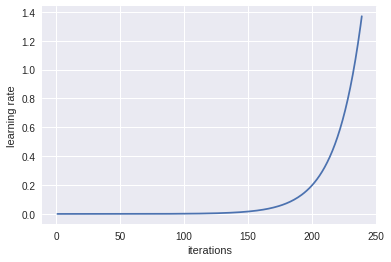

In [67]:
#Plotting the exponential growth of the learning rate
learn.sched.plot_lr()

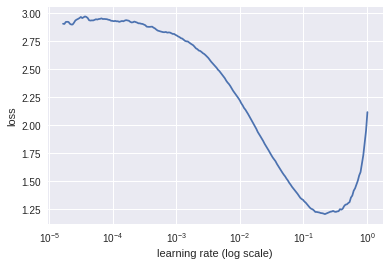

In [68]:
#Plotting loss vs. learning rate, we are interested in the learning rate value just before we hit our minimum loss
learn.sched.plot()

In [0]:
#Next we should explore data augmentation during training
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
#Method to help us visualize what data augmentation is doing
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
#Generate 6 augmented version of an image
ims = np.stack([get_augs() for i in range(6)])

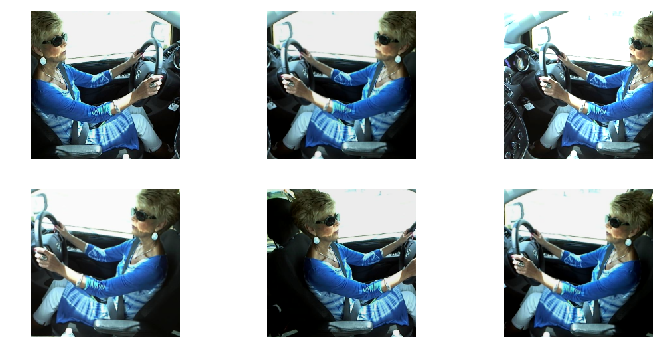

In [72]:
plots(ims, rows=2)

In [0]:
#Now create our data set with data augmentation enabled
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [74]:
#Run a single epoch, data augmentation isn't being utilized just yet
learn.fit(1e-2, 1)


epoch      trn_loss   val_loss   accuracy   
    0      0.396209   1.96426    0.423375  



[array([1.96426]), 0.42337494630573436]

In [0]:
#Now turn precompute off to take advantage of of data augmentation
learn.precompute=False

In [76]:
#Train for 3 more epochs, might be a little slower because were are not precomputing activations
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.739378   1.514073   0.509471  
 79%|███████▉  | 221/278 [02:33<00:39,  1.44it/s, loss=0.623]    1      0.620413   1.399454   0.543909  
    2      0.55258    1.395155   0.554025  



[array([1.39515]), 0.5540249677013335]

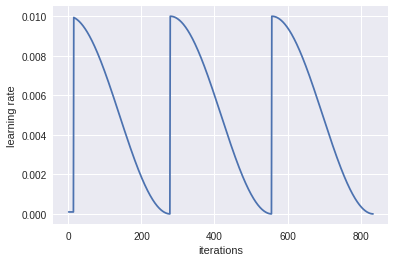

In [77]:
#The cycle_len option above defines how often the learning rate resets (SGDR)
learn.sched.plot_lr()

In [0]:
#Now we may want to train our early layers, so we unfreeze them
learn.unfreeze()

In [0]:
#The network is broken into thirds and we can control the learning rate in each section
lr=np.array([1e-4,1e-3,1e-2])

In [80]:
#Run for a few more epochs, training times will be much slower now that the early layers are being trained
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.157859   0.996349   0.692639  
 79%|███████▉  | 221/278 [04:07<01:03,  1.12s/it, loss=0.0863]    1      0.07186    0.957442   0.712441  
    2      0.048536   0.937123   0.719759  



[array([0.93712]), 0.7197589324149807]

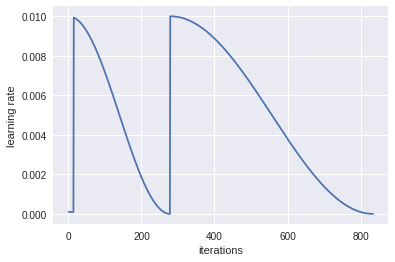

In [81]:
#Notice that the learning rate restarts are not happening at the epoch boundaries (resutl of cycle_mult parameter)
learn.sched.plot_lr()

In [82]:
#We can one more thing to improve our accuracy, Test Time Augmentation (TTA)
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [83]:
#Final accuracy
accuracy_np(probs, y)

0.725570383125269

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [0]:
#Now we can visualize our results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[288  15   4   5   1  43   0  35  61  88]
 [ 32 321   5   1   0   1   0   3 122  10]
 [  0   0 399   0   0   0   0   1  60  27]
 [ 45   7   1 385   2   0   0   4  14   2]
 [ 56  11  12   7 303   1   2   5  61   9]
 [  7   4   0   0   0 370   0   3  48   1]
 [  0   7   7   0   0   0 416   0  33   0]
 [  0   1   1   0   0   0   0 265 136   2]
 [  0   5   9   0   0   0   8  10 404   1]
 [ 34  20   3   4   0  35   1   6 136 220]]


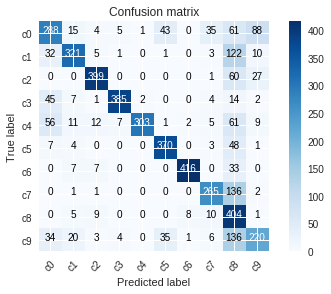

In [86]:

plot_confusion_matrix(cm, data.classes)